In [7]:
from anchor import utils
from anchor import anchor_tabular
import pandas as pd
import sklearn.ensemble
import numpy as np
from anchor import anchor_tabular
import os

In [8]:
feature_names = None
features_to_use = [2, 4, 5, 6, 7, 9]
categorical_features = [2, 4, 7]

target_idx = 1
dataset_folder = train_path = "../../../datasets/titanic/"
discretize = True
balance = True

def filter_fn(data):
  df = pd.DataFrame(data)

  df.dropna(inplace=True)
  ###
  return df.values.astype('|S128')

dataset = utils.load_csv_dataset(
            os.path.join(dataset_folder, 'train.csv'), target_idx, ',',
            feature_names=feature_names, features_to_use=features_to_use,
            categorical_features=categorical_features, discretize=discretize,
            balance=balance, filter_fn = filter_fn, skip_first=True)

In [9]:
import sys
sys.path.append(sys.path[0] + '/../..')

import arg_explainer as ae
import dataset_manager
import testbench
import utils
from importlib import reload
reload(ae)
reload(dataset_manager)
reload(testbench)
reload(utils)
import arg_explainer as ae
import dataset_manager
import testbench
import utils

nb_rows = 200
experiment_name = 'titanic'
dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=nb_rows)
print('Space size =', dm.space_size())
explainer = ae.ArgTabularExplainer(dm, experiment_name + '_' + str(nb_rows), compute=True, output_path='../../saves')
tb = testbench.Testbench(dm, exp_name=experiment_name)

# tb.explore_full_dataset(16)
# tb.explore_neighborhoods(16)

Train 0.915
Test 0.8260869565217391
2016
titanic_200
Total number of arguments:  164
Saving to  ../../saves\titanic_200_minimals.df


In [10]:
import networkx as nx

dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=None)
c = dm.get_classifier()

for nb_rows in utils.make_slices(dm.get_nb_rows(), 10):
    dm = dataset_manager.DatasetManager(dataset, classifier=c, nb_rows=nb_rows)
    explainer = ae.ArgTabularExplainer(dm, 'titanic_' + str(nb_rows), compute=True, output_path='../../saves', verbose=False)
    G = explainer.build_attack_graph(compute=True, display_graph=False)
    print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))
    print('nodes:', len(G.nodes()))
    print('edges:', len(G.edges()))
    #print('naive extensions:', nx.graph_number_of_cliques(nx.complement(G)))

Train 0.8921389396709324
Test 0.9420289855072463
titanic_54
Total number of arguments:  93
Saving to  ../../saves\titanic_54_minimals.df
edges per node: 16.365591397849464
nodes: 93
edges: 761
titanic_108
Total number of arguments:  118
Saving to  ../../saves\titanic_108_minimals.df
edges per node: 13.898305084745763
nodes: 118
edges: 820
titanic_162
Total number of arguments:  139
Saving to  ../../saves\titanic_162_minimals.df
edges per node: 14.100719424460431
nodes: 139
edges: 980
titanic_216
Total number of arguments:  154
Saving to  ../../saves\titanic_216_minimals.df
edges per node: 14.194805194805195
nodes: 154
edges: 1093
titanic_270
Total number of arguments:  155
Saving to  ../../saves\titanic_270_minimals.df
edges per node: 15.109677419354838
nodes: 155
edges: 1171
titanic_324
Total number of arguments:  154
Saving to  ../../saves\titanic_324_minimals.df
edges per node: 13.96103896103896
nodes: 154
edges: 1075
titanic_378
Total number of arguments:  163
Saving to  ../../save

[820, 980, 1093, 1171, 1075, 1168, 1219, 1194, 1437, 761]
(54, 108, 162, 216, 270, 324, 378, 432, 486, 547)
(93, 118, 139, 154, 155, 154, 163, 167, 167, 187)


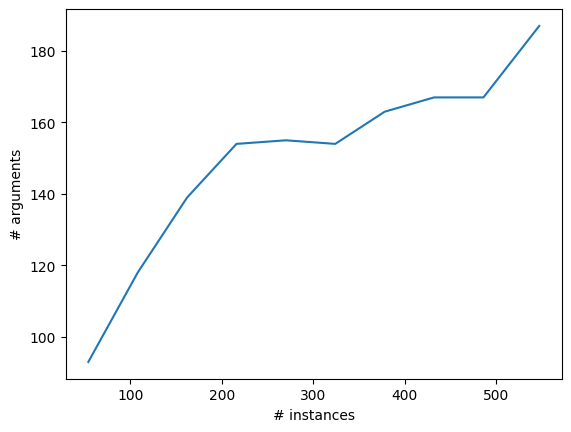

(54, 108, 162, 216, 270, 324, 378, 432, 486, 547)
(761, 820, 980, 1093, 1171, 1075, 1168, 1219, 1194, 1437)


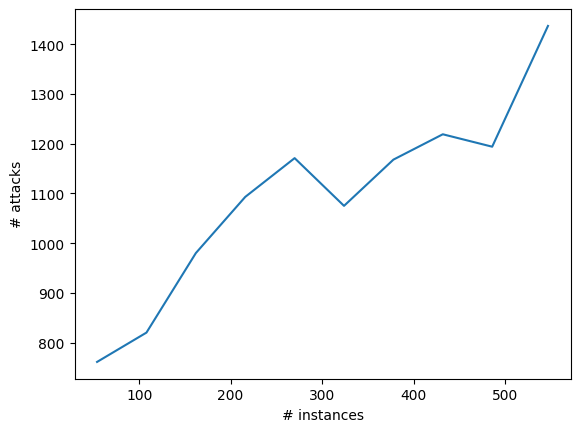

(93, 118, 139, 154, 154, 155, 163, 167, 167, 187)
(761, 820, 980, 1075, 1093, 1171, 1168, 1194, 1219, 1437)


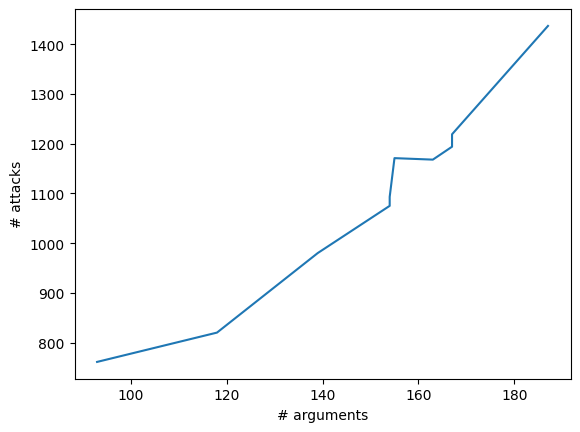

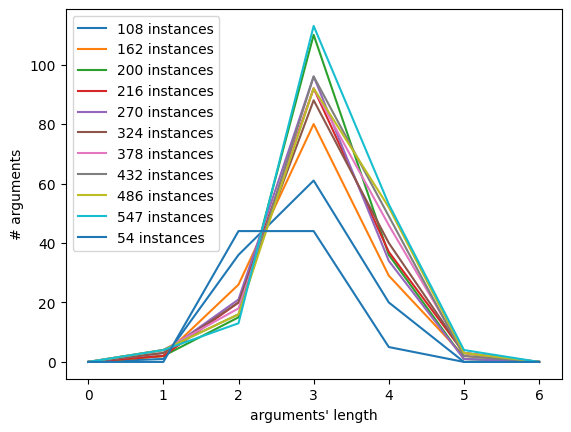

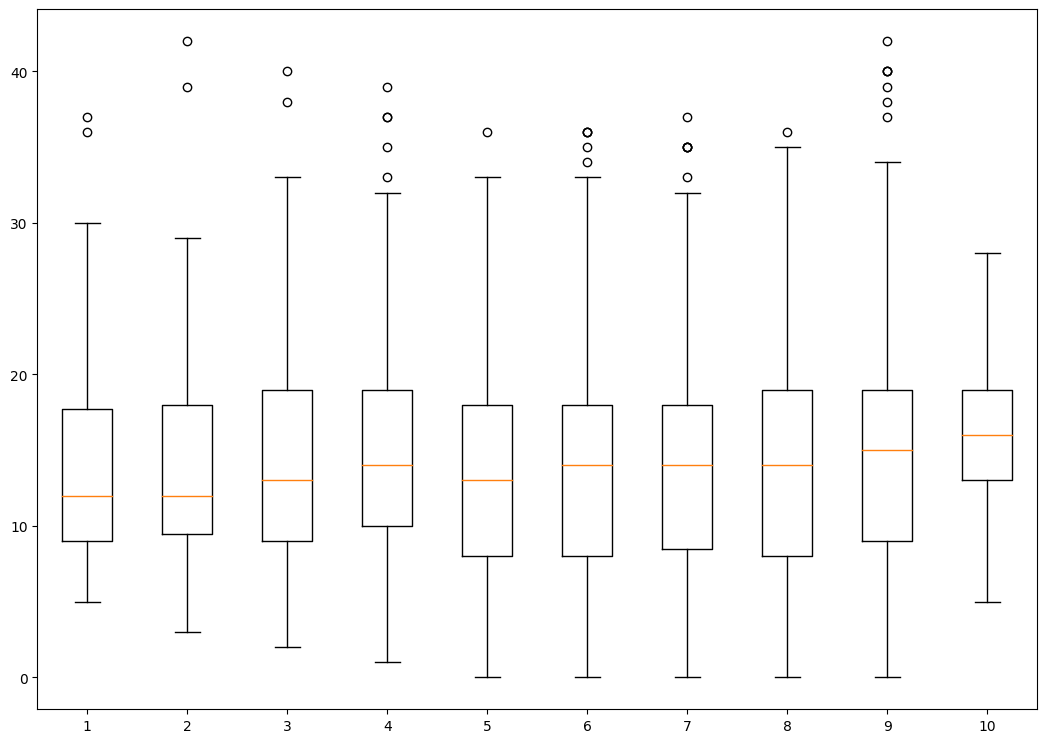

(547, 486, 432, 378, 324, 270, 216, 162, 108, 54) (0.005347593582887722, 0.005988023952095856, 0.005988023952095856, 0.006134969325153339, 0.012987012987012991, 0.0, 0.0, 0.0, 0.0, 0.0)


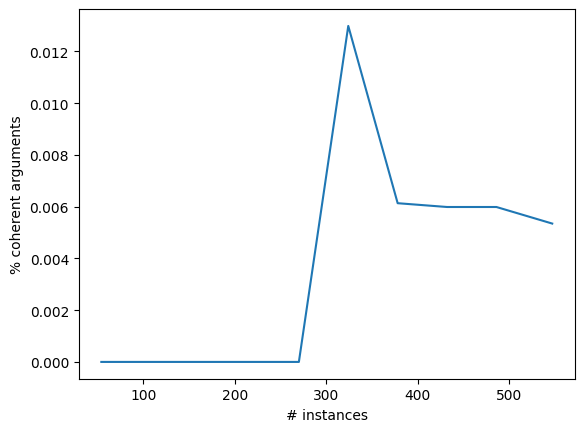

In [11]:
explainer.af_analysis(remove='')

In [37]:
G = explainer.build_attack_graph(compute=False, display_graph=False)
print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))
print('nodes:', len(G.nodes()))

explainer.export_graph('asp', '../../saves')

edges per node: 14.88135593220339
nodes: 118
